In [62]:
import warnings

warnings.filterwarnings(action='ignore') 

In [70]:
from datetime import datetime
from os import listdir
from os.path import isfile, join

import librosa.display

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import random
import itertools
import librosa
import IPython.display as ipd

%matplotlib inline

from keras.models import load_model
import tensorflow as tf
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2
import tensorflow_hub as hub


In [71]:
from google.colab import drive
drive.mount('/content/drive')

# 폴더 이동
%cd drive/My Drive/audio_predict
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/audio_predict'
/content/drive/My Drive/audio_predict
/content/drive/My Drive/audio_predict


In [72]:
# audio file load
def load_audio_file(file_path):
    input_length = 22050*5
    data = librosa.core.load(file_path)[0]
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data

In [73]:
 model = load_model('efficientnet_audio_500.h5')
 feature_model = tf.keras.models.load_model(('efficientnet_feature_500.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [74]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 514       
Total params: 256,770
Trainable params: 256,770
Non-trainable params: 0
_________________________________________________________________


In [75]:
feature_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1000)              13118936  
Total params: 13,118,936
Trainable params: 0
Non-trainable params: 13,118,936
_________________________________________________________________


In [77]:
def prediction(image,model,feature_model):
    img = cv2.imread(image)
    # img = cv2.resize(img, dsize=(500,500))//
    img = cv2.resize(img, dsize=(500,500))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    feature_vector = feature_model.predict(img)
    pred = model.predict(feature_vector)[0]
    print(model.predict(feature_vector)+[[1,1]])
    unique_sorted_Y = ['0','1']
    top_predict = pred.argmax()
    label = unique_sorted_Y[top_predict]

    return label

In [78]:
#원본 file & mel spectrogram 나타내기
def image_pred(audio):
    data = load_audio_file(audio)

    S = librosa.feature.melspectrogram(data, sr=22050, n_mels=128) 
    S_DB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_DB, sr=22050)
    audio = audio.split('/')[-1][:-4]
    image_path = './test_image/'+ audio +'.jpg'
    plt.savefig(image_path)

    res = prediction(image_path,model,feature_model)
    
    return res

In [86]:
#전체 test set pos 예측 위한 전체경로 설정
mypath = "test_audio/1"
filenames_pos = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.mp3'))] 
print(filenames_pos)


['pos-0422-096-cough-m-31-2.mp3', 'pos-0422-096-cough-m-31-6.mp3', 'pos-0421-092-cough-m-53-0.mp3', 'pos-0421-087-cough-f-40-6.mp3', 'pos-0421-087-cough-f-40-5.mp3', 'pos-0421-094-cough-m-51-6.mp3', 'pos-0422-096-cough-m-31-8.mp3', 'pos-0422-096-cough-m-31-1.mp3', 'pos-0421-094-cough-m-51-7.mp3', 'pos-0421-093-cough-f-24.mp3', 'pos-0421-094-cough-m-51-4.mp3', 'pos-0421-093-cough-f-24-6.mp3', 'pos-0421-094-cough-m-51-5.mp3', 'pos-0421-094-cough-m-51-3.mp3', 'pos-0421-094-cough-m-51-0.mp3', 'pos-0421-094-cough-m-51-2.mp3', 'pos-0421-093-cough-f-24-2.mp3', 'pos-0421-093-cough-f-24-5.mp3', 'pos-0421-093-cough-f-24-0.mp3', 'pos-0421-092-cough-m-53-13.mp3', 'pos-0421-087-cough-f-40-3.mp3', 'pos-0421-092-cough-m-53-6.mp3', 'pos-0421-092-cough-m-53-5.mp3', 'pos-0421-092-cough-m-53-3.mp3', 'pos-0421-092-cough-m-53-12.mp3', 'pos-0421-092-cough-m-53-7.mp3', 'pos-0421-092-cough-m-53-9.mp3', 'pos-0421-092-cough-m-53-1.mp3', 'pos-0421-093-cough-f-24-1.mp3', 'pos-0421-092-cough-m-53.mp3', 'pos-0422-0




  0%|          | 0/32 [00:00<?, ?it/s]

pos-0422-096-cough-m-31-2.mp3





  3%|▎         | 1/32 [00:01<00:50,  1.64s/it]

[[1.16524205 1.84394246]]
pos-0422-096-cough-m-31-6.mp3





  6%|▋         | 2/32 [00:03<00:49,  1.64s/it]

[[1.03450605 1.97097719]]
pos-0421-092-cough-m-53-0.mp3





  9%|▉         | 3/32 [00:05<00:48,  1.67s/it]

[[1.00692129 1.99363238]]
pos-0421-087-cough-f-40-6.mp3





 12%|█▎        | 4/32 [00:06<00:47,  1.68s/it]

[[1.25979698 1.7119506 ]]
pos-0421-087-cough-f-40-5.mp3





 16%|█▌        | 5/32 [00:08<00:45,  1.70s/it]

[[1.39943436 1.65909594]]
pos-0421-094-cough-m-51-6.mp3





 19%|█▉        | 6/32 [00:10<00:44,  1.71s/it]

[[1.29059041 1.74790776]]
pos-0422-096-cough-m-31-8.mp3





 22%|██▏       | 7/32 [00:12<00:44,  1.77s/it]

[[1.02336726 1.98104948]]
pos-0422-096-cough-m-31-1.mp3





 25%|██▌       | 8/32 [00:13<00:43,  1.80s/it]

[[1.24497557 1.78972244]]
pos-0421-094-cough-m-51-7.mp3





 28%|██▊       | 9/32 [00:15<00:42,  1.85s/it]

[[1.67448866 1.35037827]]
pos-0421-093-cough-f-24.mp3





 31%|███▏      | 10/32 [00:18<00:44,  2.03s/it]

[[1.00074413 1.99956489]]
pos-0421-094-cough-m-51-4.mp3





 34%|███▍      | 11/32 [00:20<00:41,  1.99s/it]

[[1.42389941 1.61044598]]
pos-0421-093-cough-f-24-6.mp3





 38%|███▊      | 12/32 [00:22<00:39,  1.98s/it]

[[1.19572067 1.82558542]]
pos-0421-094-cough-m-51-5.mp3





 41%|████      | 13/32 [00:24<00:38,  2.00s/it]

[[1.42206424 1.62394172]]
pos-0421-094-cough-m-51-3.mp3





 44%|████▍     | 14/32 [00:26<00:35,  1.98s/it]

[[1.09233859 1.91727442]]
pos-0421-094-cough-m-51-0.mp3





 47%|████▋     | 15/32 [00:28<00:34,  2.02s/it]

[[1.35963029 1.59594333]]
pos-0421-094-cough-m-51-2.mp3





 50%|█████     | 16/32 [00:30<00:33,  2.09s/it]

[[1.27119091 1.7427544 ]]
pos-0421-093-cough-f-24-2.mp3





 53%|█████▎    | 17/32 [00:32<00:31,  2.10s/it]

[[1.69921237 1.31448904]]
pos-0421-093-cough-f-24-5.mp3





 56%|█████▋    | 18/32 [00:34<00:29,  2.12s/it]

[[1.27712557 1.77825594]]
pos-0421-093-cough-f-24-0.mp3





 59%|█████▉    | 19/32 [00:37<00:27,  2.15s/it]

[[1.54834884 1.50299209]]
pos-0421-092-cough-m-53-13.mp3





 62%|██████▎   | 20/32 [00:39<00:26,  2.18s/it]

[[1.19718969 1.82955444]]
pos-0421-087-cough-f-40-3.mp3





 66%|██████▌   | 21/32 [00:41<00:24,  2.24s/it]

[[1.31547794 1.7262913 ]]
pos-0421-092-cough-m-53-6.mp3





 69%|██████▉   | 22/32 [00:44<00:22,  2.26s/it]

[[1.00353661 1.9966287 ]]
pos-0421-092-cough-m-53-5.mp3





 72%|███████▏  | 23/32 [00:46<00:20,  2.28s/it]

[[1.03784147 1.96834093]]
pos-0421-092-cough-m-53-3.mp3





 75%|███████▌  | 24/32 [00:48<00:18,  2.28s/it]

[[1.35991105 1.68100643]]
pos-0421-092-cough-m-53-12.mp3





 78%|███████▊  | 25/32 [00:50<00:16,  2.29s/it]

[[1.04098842 1.9586556 ]]
pos-0421-092-cough-m-53-7.mp3





 81%|████████▏ | 26/32 [00:53<00:13,  2.31s/it]

[[1.00169745 1.99863791]]
pos-0421-092-cough-m-53-9.mp3





 84%|████████▍ | 27/32 [00:55<00:11,  2.33s/it]

[[1.00541511 1.99495149]]
pos-0421-092-cough-m-53-1.mp3





 88%|████████▊ | 28/32 [00:58<00:09,  2.35s/it]

[[1.02044329 1.98279184]]
pos-0421-093-cough-f-24-1.mp3





 91%|█████████ | 29/32 [01:00<00:07,  2.37s/it]

[[1.59049237 1.4220584 ]]
pos-0421-092-cough-m-53.mp3





 94%|█████████▍| 30/32 [01:04<00:05,  2.72s/it]

[[1.00047493 1.99974775]]
pos-0422-096-cough-m-31.mp3





 97%|█████████▋| 31/32 [01:07<00:02,  2.90s/it]

[[1.0043717  1.99700701]]
pos-0421-094-cough-m-51.mp3





100%|██████████| 32/32 [01:10<00:00,  2.21s/it]

[[1.44160637 1.60613394]]
정확도 :  0.875


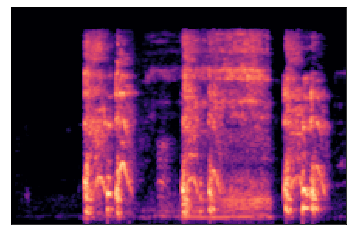

In [88]:
from tqdm import tqdm
neg = 0
pos = 0

for i in tqdm(filenames_pos):
    print(i)
    res = image_pred('test_audio/1/'+ i)
    if res == '0':
        neg +=1
    else:
        pos +=1

print('정확도 : ', (pos/(neg+pos)))

In [89]:
#전체 test set neg 예측 위한 전체경로 설정
mypath = "test_audio/0"
filenames = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.mp3'))] 
print(filenames)

['neg-0421-091-cough-m-47-5.mp3', 'neg-0421-090-cough-f-17-7.mp3', 'neg-0421-090-cough-f-17-6.mp3', 'neg-0421-091-cough-m-47-6.mp3', 'neg-0421-090-cough-f-17-11.mp3', 'neg-0421-091-cough-m-47-4.mp3', 'neg-0421-090-cough-f-17-3.mp3', 'neg-0421-090-cough-f-17-4.mp3', 'neg-0421-090-cough-f-17-5.mp3', 'neg-0421-090-cough-f-17-2.mp3', 'neg-0422-097-cough-m-37-8.mp3', 'neg-0422-097-cough-m-37-3.mp3', 'neg-0422-095-cough-m-53-15.mp3', 'neg-0422-098-cough-f-24-0.mp3', 'neg-0422-098-cough-f-24-5.mp3', 'neg-0422-097-cough-m-37-9.mp3', 'neg-0422-098-cough-f-24-1.mp3', 'neg-0422-097-cough-m-37-4.mp3', 'neg-0422-097-cough-m-37-1.mp3', 'neg-0421-091-cough-m-47.mp3', 'neg-0422-097-cough-m-37.mp3', 'neg-0422-095-cough-m-53.mp3', 'neg-0421-090-cough-f-17.mp3', 'neg-0422-098-cough-f-24.mp3', 'neg-0422-095-cough-m-53-7.mp3', 'neg-0422-095-cough-m-53-8.mp3', 'neg-0422-095-cough-m-53-6.mp3', 'neg-0422-095-cough-m-53-14.mp3', 'neg-0422-095-cough-m-53-13.mp3', 'neg-0422-095-cough-m-53-12.mp3', 'neg-0422-095-




  0%|          | 0/43 [00:00<?, ?it/s]


  2%|▏         | 1/43 [00:01<01:00,  1.43s/it]

[[1.52193576 1.48995134]]





  5%|▍         | 2/43 [00:02<00:58,  1.44s/it]

[[1.56602931 1.46287245]]





  7%|▋         | 3/43 [00:04<00:57,  1.45s/it]

[[1.45135635 1.58172214]]





  9%|▉         | 4/43 [00:05<00:57,  1.47s/it]

[[1.621656   1.37544727]]





 12%|█▏        | 5/43 [00:07<00:56,  1.48s/it]

[[1.75012696 1.2519989 ]]





 14%|█▍        | 6/43 [00:08<00:55,  1.49s/it]

[[1.60424042 1.41053763]]





 16%|█▋        | 7/43 [00:10<00:54,  1.50s/it]

[[1.60350174 1.40870321]]





 19%|█▊        | 8/43 [00:11<00:53,  1.53s/it]

[[1.11126542 1.89374018]]





 21%|██        | 9/43 [00:13<00:52,  1.54s/it]

[[1.68616068 1.3687833 ]]





 23%|██▎       | 10/43 [00:15<00:51,  1.56s/it]

[[1.79392987 1.20324418]]





 26%|██▌       | 11/43 [00:16<00:51,  1.60s/it]

[[1.66708118 1.31061399]]





 28%|██▊       | 12/43 [00:18<00:50,  1.63s/it]

[[1.80140513 1.20260927]]





 30%|███       | 13/43 [00:20<00:49,  1.66s/it]

[[1.52453226 1.47140637]]





 33%|███▎      | 14/43 [00:22<00:48,  1.69s/it]

[[1.32887784 1.67884833]]





 35%|███▍      | 15/43 [00:23<00:47,  1.71s/it]

[[1.04720902 1.95531571]]





 37%|███▋      | 16/43 [00:25<00:46,  1.74s/it]

[[1.72919565 1.27328801]]





 40%|███▉      | 17/43 [00:27<00:45,  1.77s/it]

[[1.02375212 1.9833191 ]]





 42%|████▏     | 18/43 [00:29<00:44,  1.79s/it]

[[1.60787022 1.39573994]]





 44%|████▍     | 19/43 [00:31<00:43,  1.81s/it]

[[1.42685437 1.60054713]]





 47%|████▋     | 20/43 [00:33<00:48,  2.09s/it]

[[1.00361288 1.99812806]]





 49%|████▉     | 21/43 [00:36<00:51,  2.33s/it]

[[1.00026125 1.99983352]]





 51%|█████     | 22/43 [00:39<00:51,  2.47s/it]

[[1.00201723 1.9989565 ]]





 53%|█████▎    | 23/43 [00:42<00:50,  2.53s/it]

[[1.05200556 1.95317787]]





 56%|█████▌    | 24/43 [00:44<00:48,  2.56s/it]

[[1.08907843 1.91194016]]





 58%|█████▊    | 25/43 [00:46<00:43,  2.40s/it]

[[1.00494948 1.99405026]]





 60%|██████    | 26/43 [00:48<00:39,  2.30s/it]

[[1.54854017 1.49514633]]





 63%|██████▎   | 27/43 [00:51<00:35,  2.24s/it]

[[1.20588043 1.8064009 ]]





 65%|██████▌   | 28/43 [00:53<00:32,  2.19s/it]

[[1.5325284  1.45731953]]





 67%|██████▋   | 29/43 [00:55<00:30,  2.18s/it]

[[1.01985097 1.98021936]]





 70%|██████▉   | 30/43 [00:57<00:28,  2.18s/it]

[[1.91908199 1.08388475]]





 72%|███████▏  | 31/43 [00:59<00:26,  2.17s/it]

[[1.04357079 1.95976305]]





 74%|███████▍  | 32/43 [01:01<00:24,  2.21s/it]

[[1.08068496 1.93422657]]





 77%|███████▋  | 33/43 [01:04<00:22,  2.25s/it]

[[1.00267065 1.99789411]]





 79%|███████▉  | 34/43 [01:06<00:20,  2.28s/it]

[[1.01040077 1.98866999]]





 81%|████████▏ | 35/43 [01:09<00:18,  2.32s/it]

[[1.15433395 1.88324022]]





 84%|████████▎ | 36/43 [01:11<00:16,  2.33s/it]

[[1.18867821 1.85068977]]





 86%|████████▌ | 37/43 [01:13<00:14,  2.35s/it]

[[1.04918918 1.9578774 ]]





 88%|████████▊ | 38/43 [01:16<00:11,  2.39s/it]

[[1.36127383 1.67941475]]





 91%|█████████ | 39/43 [01:18<00:09,  2.43s/it]

[[1.83104038 1.14855495]]





 93%|█████████▎| 40/43 [01:21<00:07,  2.46s/it]

[[1.48178989 1.53261197]]





 95%|█████████▌| 41/43 [01:23<00:04,  2.47s/it]

[[1.67620867 1.33064213]]





 98%|█████████▊| 42/43 [01:26<00:02,  2.48s/it]

[[1.58702666 1.41764396]]





100%|██████████| 43/43 [01:28<00:00,  2.07s/it]

[[1.37498215 1.68002295]]
정확도 :  0.4418604651162791


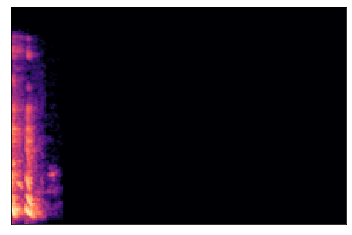

In [90]:
from tqdm import tqdm
neg = 0
pos = 0

for i in tqdm(filenames):
    res = image_pred('test_audio/0/'+ i)
    if res == '0':
        neg +=1
    else:
        pos +=1

print('정확도 : ', (neg/(neg+pos)))

In [91]:
print(neg,pos)

19 24


In [ ]:
#하나씩 예측하기
image_pred('train_cough_data/neg_cough/0HIgO2EhOOW1msCbEw1kC8Qsx6D3cough-shallow.wav')

In [ ]:
/content/drive/My Drive/audio_predict/train_cough_data/neg_cough/01OCEf1yB4czsq8ygRoT51s96Ba2cough-shallow.wav
/content/drive/My Drive/audio_predict/train_cough_data/neg_cough/0HIgO2EhOOW1msCbEw1kC8Qsx6D3cough-shallow.wav